# Lab 3: Exploratory Data Analysis (EDA) - Heart Disease Dataset

## Problem Statement

Given patient medical attributes (age, sex, chest pain type, resting blood pressure, cholesterol, etc.), predict whether the patient has heart disease or not.

- **Problem Type:** Binary Classification
- **Target Variable:** `target` (1 = heart disease, 0 = no heart disease)
- **Dataset Source:** [UCI Machine Learning Repository - Heart Disease](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In this lab, we apply Exploratory Data Analysis (EDA) techniques to understand the dataset before building any machine learning model.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Load Dataset

df = pd.read_csv("heart.csv")

# Display first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Check Missing Values

In [3]:
# Check all values
print(df.isna())

       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
292  False  False  False     False  False  False    False    False  False   
293  False  False  False     False  False  False    False    False  False   
294  False  False  False     False  False  False    False    False  False   
295  False  False  False     False  False  False    False    False  False   
296  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  Fal

In [4]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Check Duplicate Rows

In [5]:
# Checking duplicate rows
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

### No. of Rows and Columns

In [6]:
# Finding number of rows and columns

print("Shape (rows, columns): ", df.shape, "\n")

print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Shape (rows, columns):  (297, 14) 

Number of rows:  297
Number of columns:  14


### Data Type of Columns

In [7]:
# Viewing the data types of columns
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [8]:
# Convert categorical columns from float to int for cleaner analysis
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[categorical_cols] = df[categorical_cols].astype(int)

df.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Descriptive Summary Statistics

In [9]:
# Statistical summary
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Univariate Analysis

#### Distribution of Age

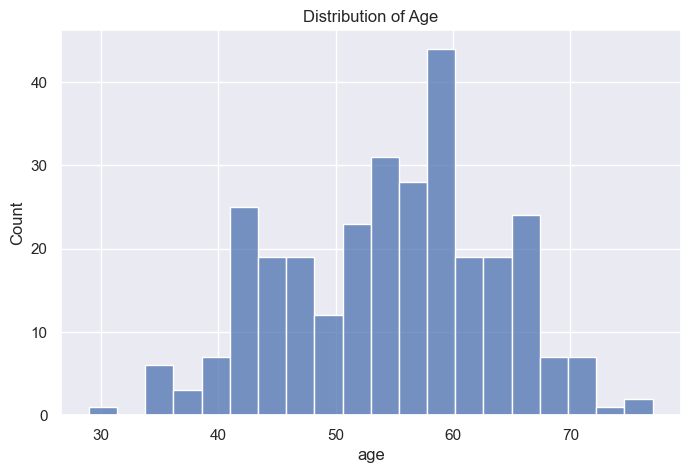

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20)
plt.title("Distribution of Age")
plt.show()

- Most patients are between 50 and 65 years old
- The distribution is slightly left-skewed

#### Distribution of Cholesterol

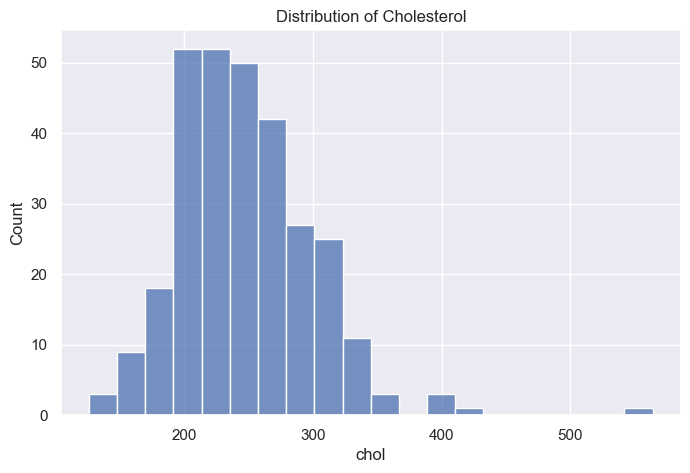

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['chol'], bins=20)
plt.title("Distribution of Cholesterol")
plt.show()

- Cholesterol values are roughly normally distributed
- Most patients have cholesterol between 200 and 300

#### Distribution of Max Heart Rate (thalach)

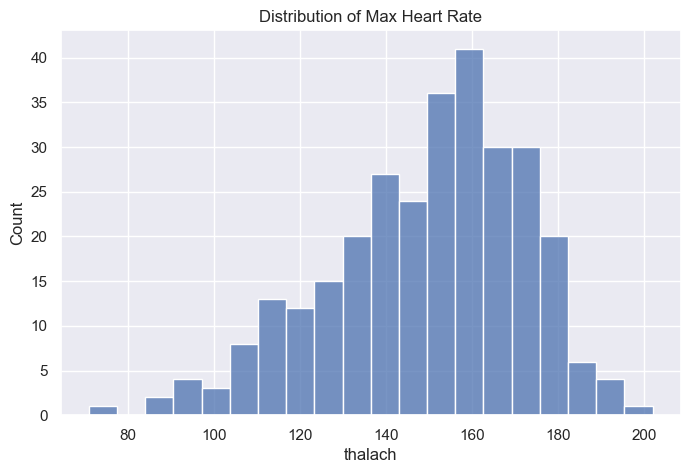

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['thalach'], bins=20)
plt.title("Distribution of Max Heart Rate")
plt.show()

#### Target Variable Distribution

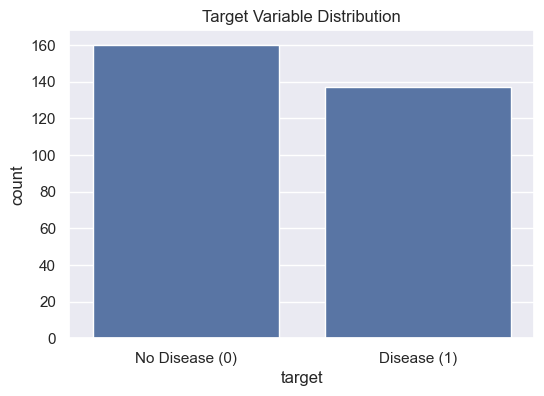

Target Value Counts:
target
0    160
1    137
Name: count, dtype: int64


In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])
plt.show()

print("Target Value Counts:")
print(df['target'].value_counts())

- The dataset is relatively balanced between the two classes

## Bivariate Analysis

### Heart Disease by Sex

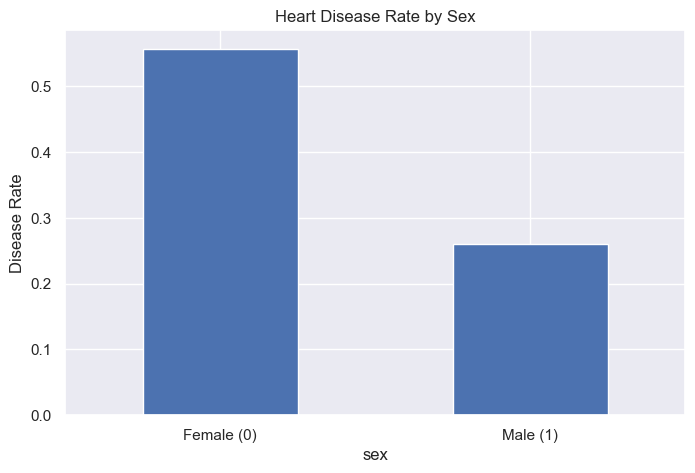

sex
1    0.557214
0    0.260417
Name: target, dtype: float64

In [14]:
sex_disease = df.groupby('sex')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sex_disease.plot(kind='bar')
plt.title("Heart Disease Rate by Sex")
plt.ylabel("Disease Rate")
plt.xticks([0, 1], ['Female (0)', 'Male (1)'], rotation=0)
plt.show()

sex_disease

### Heart Disease by Chest Pain Type

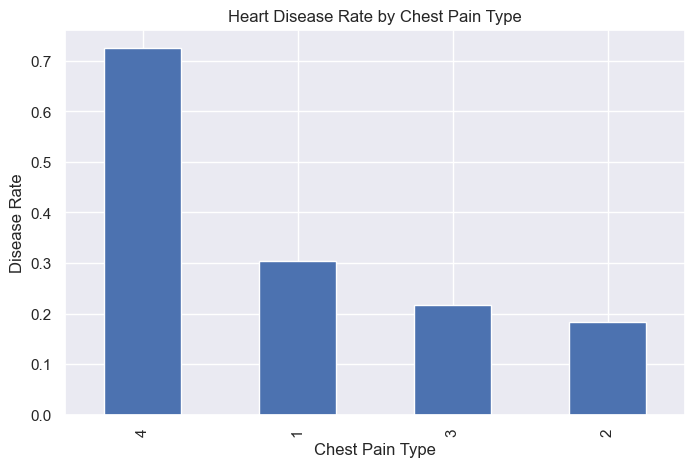

cp
4    0.725352
1    0.304348
3    0.216867
2    0.183673
Name: target, dtype: float64

In [15]:
cp_disease = df.groupby('cp')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
cp_disease.plot(kind='bar')
plt.title("Heart Disease Rate by Chest Pain Type")
plt.ylabel("Disease Rate")
plt.xlabel("Chest Pain Type")
plt.show()

cp_disease

### Average Cholesterol by Target

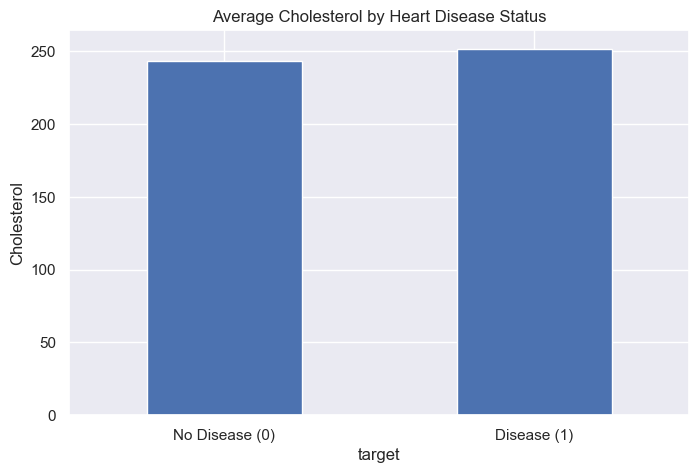

target
0    243.493750
1    251.854015
Name: chol, dtype: float64

In [16]:
target_chol = df.groupby('target')['chol'].mean()

plt.figure(figsize=(8, 5))
target_chol.plot(kind='bar')
plt.title("Average Cholesterol by Heart Disease Status")
plt.ylabel("Cholesterol")
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'], rotation=0)
plt.show()

target_chol

### Age vs Max Heart Rate Relationship

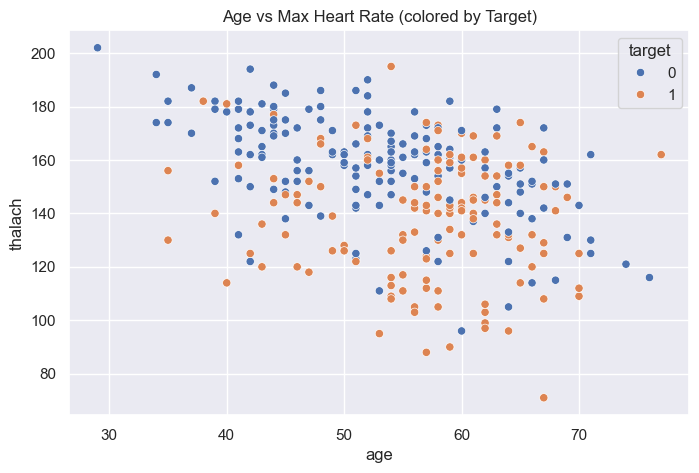

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title("Age vs Max Heart Rate (colored by Target)")
plt.show()

- Patients with heart disease tend to have higher max heart rates
- Max heart rate generally decreases with age

### Correlation Matrix

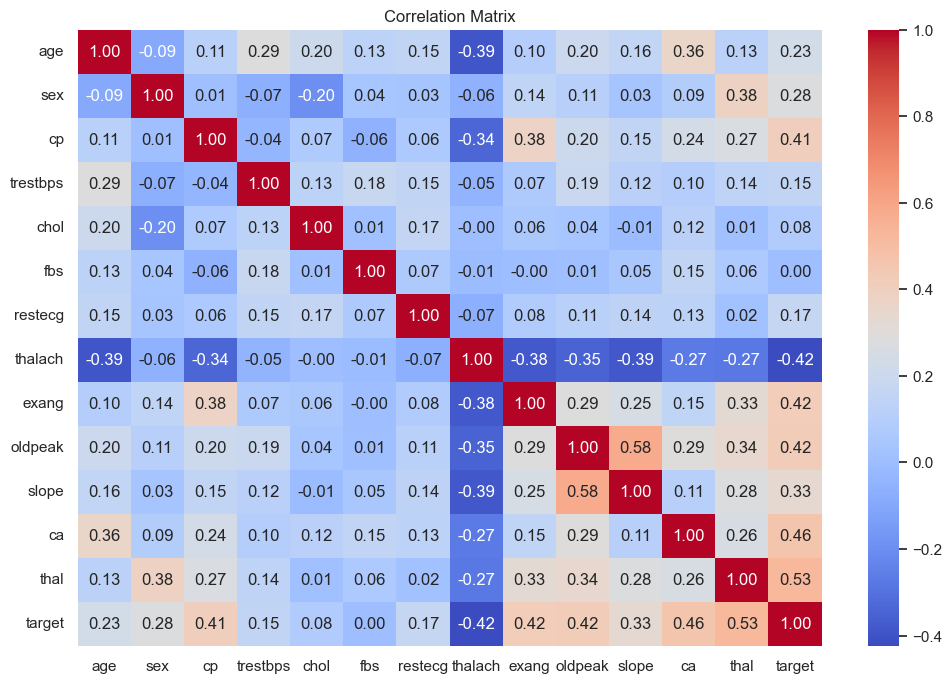

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Correlation close to -1 = strong negative relationship
- Close to 0 = weak relationship

Key observations:
- `cp` (chest pain type) has a notable positive correlation with `target`
- `thalach` (max heart rate) has a positive correlation with `target`
- `exang` (exercise-induced angina) has a negative correlation with `target`
- `oldpeak` (ST depression) has a negative correlation with `target`

## Feature Analysis

### Top Correlated Features with Target

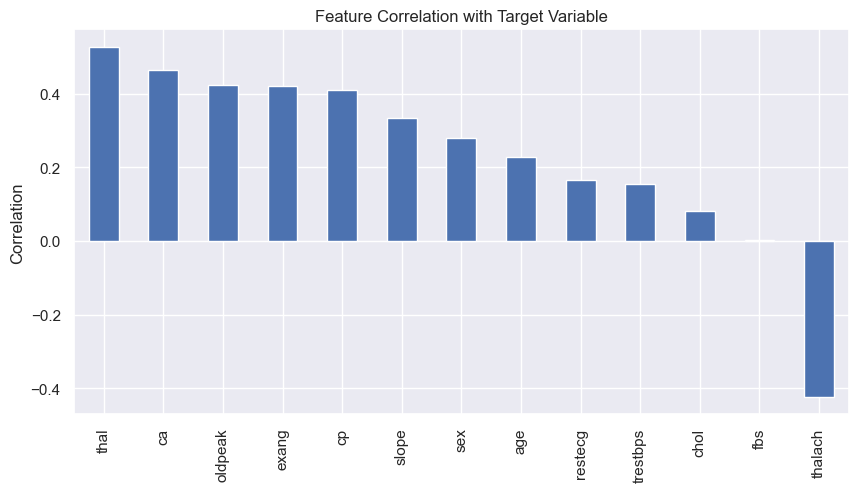

thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64

In [19]:
target_corr = df.corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(10, 5))
target_corr.plot(kind='bar')
plt.title("Feature Correlation with Target Variable")
plt.ylabel("Correlation")
plt.show()

target_corr

This helps identify which features are most important for predicting heart disease.